# Transformer Tokenization and Text Embedding

This notebook demonstrates how to generate text embeddings using two different models: a sentence-transformer model from Hugging Face and Google's Gemini model. We will then visualize these embeddings and compare their similarity.

## 1. Setup and Imports

In [3]:
# Before running this, make sure you have installed the required libraries:
# pip install sentence-transformers google-generativeai scikit-learn matplotlib python-dotenv

# Core libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from dotenv import load_dotenv

# Hugging Face library
from sentence_transformers import SentenceTransformer

# Google Gemini library
import google.generativeai as genai

# Load environment variables from .env file
load_dotenv()

True

## 2. Define Input Texts

In [4]:
texts = [
    "Artificial Intelligence is transforming the world.",
    "Machine Learning is a subset of Artificial Intelligence.",
    "Transformers are the backbone of modern NLP.",
    "Generative AI creates content like humans.",
    "Data is the new oil.",
    "Large Language Models can reason and write code."
]

## 3. Hugging Face Embeddings

We will use the `sentence-transformers/all-MiniLM-L6-v2` model. The `sentence-transformers` library provides a simple `.encode()` method that handles tokenization, padding, and pooling automatically.

In [5]:
# Load the pre-trained model
model_name = "sentence-transformers/all-MiniLM-L6-v2"
hf_model = SentenceTransformer(model_name)

# Generate embeddings with one simple command
hf_embeddings = hf_model.encode(texts)

print("Hugging Face Embeddings Shape:", hf_embeddings.shape)

Hugging Face Embeddings Shape: (6, 384)


## 4. Google Gemini Embeddings

Next, we'll generate embeddings using Google's `embedding-001` model.

In [7]:
# Configure the Gemini API key
GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

# Generate embeddings
result = genai.embed_content(
    model="models/text-embedding-004",
    content=texts,
    task_type="RETRIEVAL_DOCUMENT"
)

gemini_embeddings = np.array(result['embedding'])

print("Gemini Embeddings Shape:", gemini_embeddings.shape)

Gemini Embeddings Shape: (6, 768)


## 5. Visualize Embeddings

Since embeddings have high dimensionality (384 for HF, 768 for Gemini), we'll use **Principal Component Analysis (PCA)** to reduce them to 2 dimensions for plotting.

In [8]:
def plot_embeddings(embeddings, texts, title):
    """Reduces embeddings to 2D and plots them."""
    # Reduce dimensionality with PCA
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings)
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.7, edgecolors='k')
    
    # Annotate each point with its text label
    for i, txt in enumerate(texts):
        plt.annotate(f"{i+1}. {txt[:30]}...", (embeddings_2d[i, 0], embeddings_2d[i, 1]), xytext=(5, 2), textcoords='offset points')
    
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)
    plt.show()

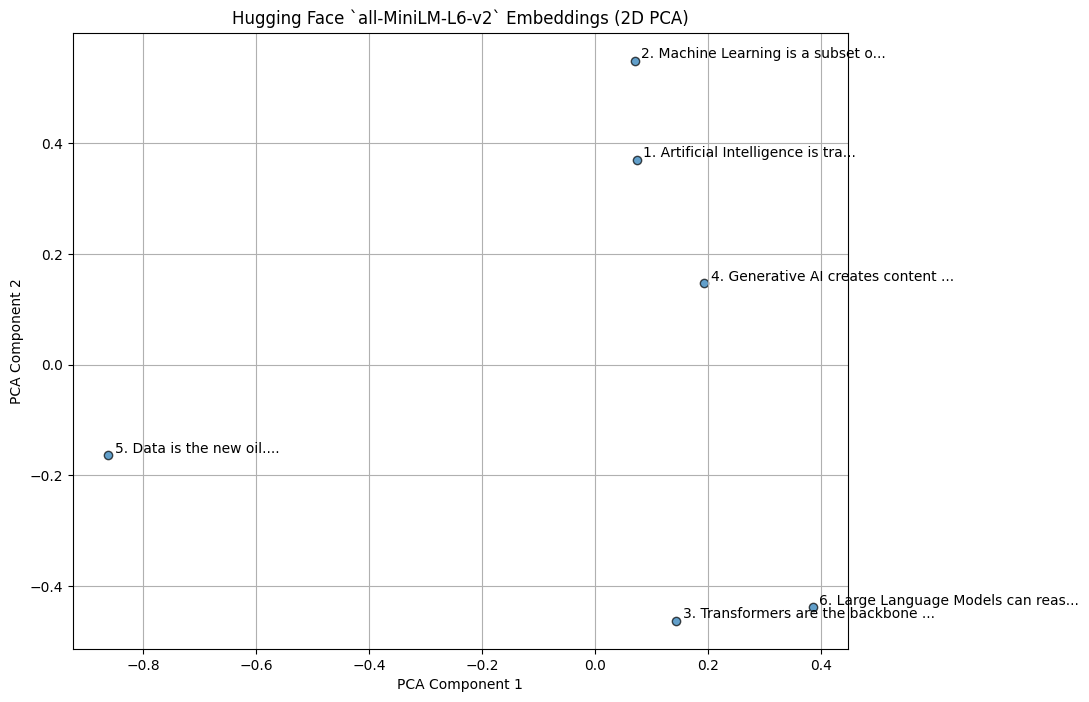

In [9]:
# Visualize Hugging Face embeddings
plot_embeddings(hf_embeddings, texts, "Hugging Face `all-MiniLM-L6-v2` Embeddings (2D PCA)")

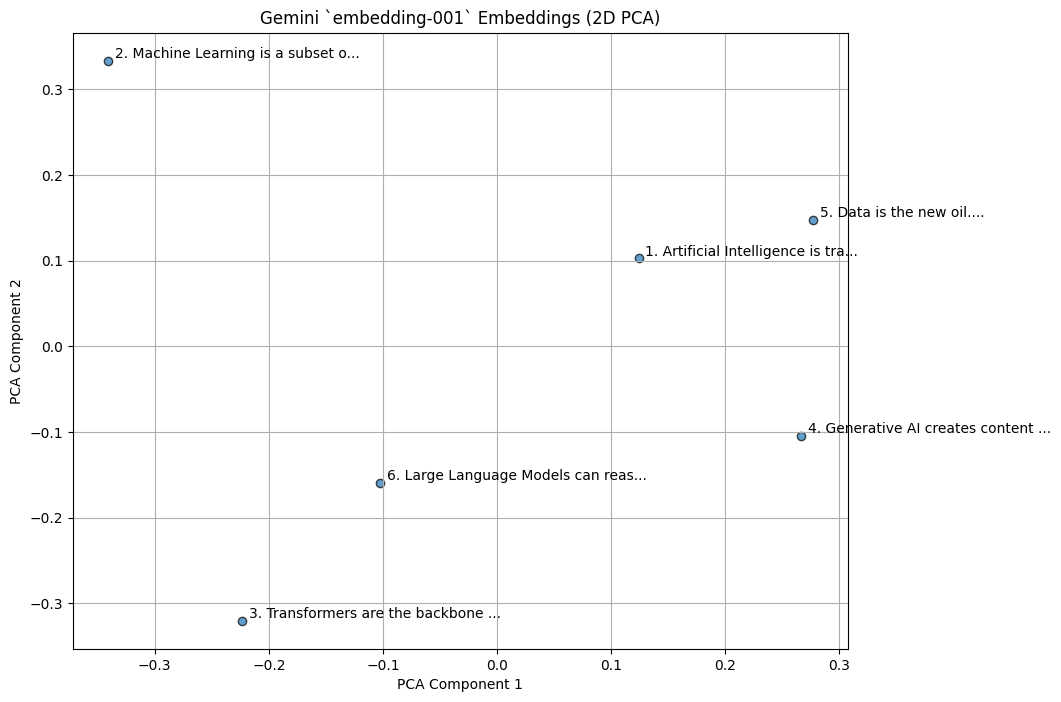

In [10]:
# Visualize Gemini embeddings
plot_embeddings(gemini_embeddings, texts, "Gemini `embedding-001` Embeddings (2D PCA)")

## 6. Compare Similarity

Let's calculate the **cosine similarity** for both sets of embeddings to see how each model groups the sentences.

In [11]:
hf_similarity = cosine_similarity(hf_embeddings)
gemini_similarity = cosine_similarity(gemini_embeddings)

print("--- Hugging Face Cosine Similarity Matrix ---")
print(np.round(hf_similarity, 2))

print("\n--- Gemini Cosine Similarity Matrix ---")
print(np.round(gemini_similarity, 2))

--- Hugging Face Cosine Similarity Matrix ---
[[1.   0.56 0.42 0.5  0.25 0.29]
 [0.56 1.   0.22 0.36 0.18 0.29]
 [0.42 0.22 1.   0.35 0.21 0.42]
 [0.5  0.36 0.35 1.   0.17 0.33]
 [0.25 0.18 0.21 0.17 1.   0.1 ]
 [0.29 0.29 0.42 0.33 0.1  1.  ]]

--- Gemini Cosine Similarity Matrix ---
[[1.   0.79 0.78 0.84 0.85 0.79]
 [0.79 1.   0.72 0.7  0.71 0.76]
 [0.78 0.72 1.   0.72 0.72 0.77]
 [0.84 0.7  0.72 1.   0.78 0.8 ]
 [0.85 0.71 0.72 0.78 1.   0.74]
 [0.79 0.76 0.77 0.8  0.74 1.  ]]
